In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")


# layers, dropout+-, aantal nodes/laag
# LM experiment regularisatie + learning rate + loss + optimizer
# minder layers + optimizers + regularizer => loopje
# training time?
# MVP?

In [3]:
class MLP:
    def __init__(self, CIFAR, adam_optimizer):
        if adam_optimizer:
          self.optimize = 'adam'
        else:
          self.optimize = 'sgd'

        self.model = keras.models.Sequential()
        if CIFAR:
          self.model.add(keras.layers.Flatten(input_shape=[32,32,3]))
        else:
          self.model.add(keras.layers.Flatten(input_shape=[28,28,1]))
        self.model.add(keras.layers.Dense(300, activation="relu"))
        self.model.add(keras.layers.Dense(100, activation="relu"))
        self.model.add(keras.layers.Dense(10, activation="softmax"))

    def train(self,X_train, y_train, X_test, y_test, X_valid, y_valid):
        self.model.compile(loss= 'sparse_categorical_crossentropy', optimizer=self.optimize, metrics=["accuracy"])   # optimizer = keras.optimizers.SGD(lr=0.01)
        self.history = self.model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))          # class_weight=class_weight

    def figure(self):
        pd.DataFrame(self.history.history).plot(figsize=(8,5))
        plt.grid(True)
        plt.gca().set_ylim(0,1)
        plt.show()


In [14]:
class CNN:
    def __init__(self, CIFAR, omit_layer, adam_optimizer, omit_dropout):
        if CIFAR:
            ishape = [32,32,3]
        else:
            ishape = [28,28,1]
        if adam_optimizer:
            self.optimize = 'adam'
        else:
            self.optimize = 'sgd'

        if not omit_layer:
            self.model = model = keras.models.Sequential([
                DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
                keras.layers.MaxPooling2D(pool_size=2),
                DefaultConv2D(filters=128),
                DefaultConv2D(filters=128),
                keras.layers.MaxPooling2D(pool_size=2),
                DefaultConv2D(filters=256),
                DefaultConv2D(filters=256),
                keras.layers.MaxPooling2D(pool_size=2),
                keras.layers.Flatten(),
                keras.layers.Dense(units=128, activation='relu'),
            ])
        else:
            self.model = model = keras.models.Sequential([
                DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
                keras.layers.MaxPooling2D(pool_size=2),
                DefaultConv2D(filters=128),
                keras.layers.MaxPooling2D(pool_size=2),
                DefaultConv2D(filters=256),
                keras.layers.MaxPooling2D(pool_size=2),
                keras.layers.Flatten(),
                keras.layers.Dense(units=128, activation='relu'),
            ])

        if not omit_dropout:
            self.model.add(keras.layers.Dropout(0.5))
        self.model.add(keras.layers.Dense(units=64, activation='relu'))
        if not omit_dropout:
            self.model.add(keras.layers.Dropout(0.5))
        self.model.add(keras.layers.Dense(units=10, activation='softmax'))

        self.filename = 'test'

    def printf(self, input):
        with open(self.filename, 'a') as f:
            print(input, file=f)

    def train(self,X_train, y_train, X_test, y_test, X_valid, y_valid):
        self.model.compile(loss= 'sparse_categorical_crossentropy', optimizer=self.optimize, metrics=["accuracy"])   # optimizer = keras.optimizers.SGD(lr=0.01) => batch norm / adam
        self.history = self.model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))          # class_weight=class_weight

    def figure(self):
        pd.DataFrame(self.history.history).plot(figsize=(8,5))
        plt.grid(True)
        plt.gca().set_ylim(0,1)
        plt.show()


In [6]:
def prep_data(CIFAR):
    if not CIFAR:
        (X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
        X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
        y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
        X_test = X_test / 255.0
        # class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle_boot"]
        return X_train, y_train, X_test, y_test, X_valid, y_valid
    else:
        (X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
        assert X_train_full.shape == (50000, 32, 32, 3)
        assert X_test.shape == (10000, 32, 32, 3)
        assert y_train_full.shape == (50000, 1)
        assert y_test.shape == (10000, 1)
        X_valid, X_train = X_train_full[:10000] / 255.0, X_train_full[10000:]/255.0
        y_valid, y_train = y_train_full[:10000], y_train_full[10000:]
        X_test = X_test / 255.0
        return X_train, y_train, X_test, y_test, X_valid, y_valid


Epoch 1/30
1719/1719 [==============================] - 12s 5ms/step - loss: 0.4492 - accuracy: 0.8351 - val_loss: 0.3065 - val_accuracy: 0.8836
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2884 - accuracy: 0.8929 - val_loss: 0.2572 - val_accuracy: 0.9056
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2429 - accuracy: 0.9102 - val_loss: 0.2525 - val_accuracy: 0.9068
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2122 - accuracy: 0.9213 - val_loss: 0.2456 - val_accuracy: 0.9090
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1862 - accuracy: 0.9301 - val_loss: 0.2405 - val_accuracy: 0.9154
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1633 - accuracy: 0.9389 - val_loss: 0.2220 - val_accuracy: 0.9178
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1436 - accuracy: 0.9471 - val_loss: 0.2339 - val_accuracy

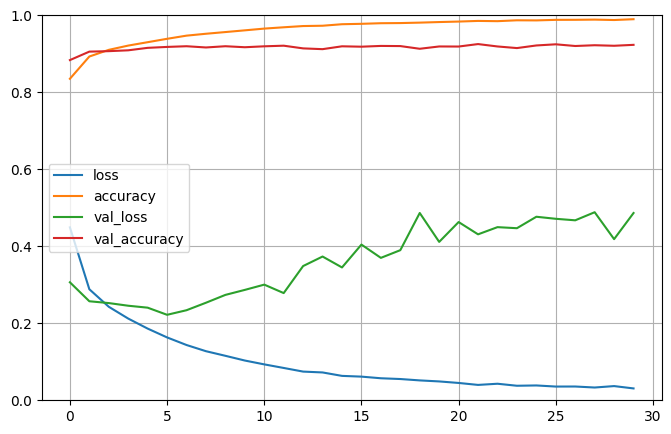

Epoch 1/30
1719/1719 [==============================] - 11s 5ms/step - loss: 0.7547 - accuracy: 0.7237 - val_loss: 0.3534 - val_accuracy: 0.8728
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4372 - accuracy: 0.8501 - val_loss: 0.3016 - val_accuracy: 0.8962
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3712 - accuracy: 0.8741 - val_loss: 0.2963 - val_accuracy: 0.8956
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3346 - accuracy: 0.8854 - val_loss: 0.2508 - val_accuracy: 0.9094
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3032 - accuracy: 0.8969 - val_loss: 0.2812 - val_accuracy: 0.8944
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2823 - accuracy: 0.9025 - val_loss: 0.2625 - val_accuracy: 0.9010
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2622 - accuracy: 0.9103 - val_loss: 0.2453 - val_accuracy

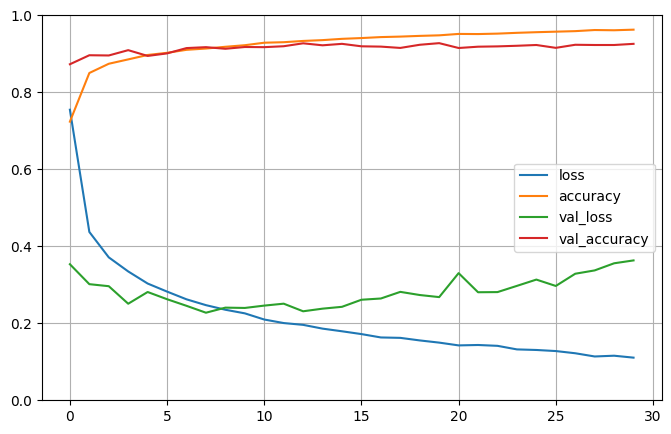

Epoch 1/30
1719/1719 [==============================] - 15s 7ms/step - loss: 0.4512 - accuracy: 0.8335 - val_loss: 0.3119 - val_accuracy: 0.8868
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2910 - accuracy: 0.8918 - val_loss: 0.2646 - val_accuracy: 0.9002
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2453 - accuracy: 0.9081 - val_loss: 0.2425 - val_accuracy: 0.9114
Epoch 4/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2146 - accuracy: 0.9187 - val_loss: 0.2480 - val_accuracy: 0.9120
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1961 - accuracy: 0.9265 - val_loss: 0.2529 - val_accuracy: 0.9082
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1701 - accuracy: 0.9367 - val_loss: 0.2409 - val_accuracy: 0.9168
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1531 - accuracy: 0.9425 - val_loss: 0.2219 - val_ac

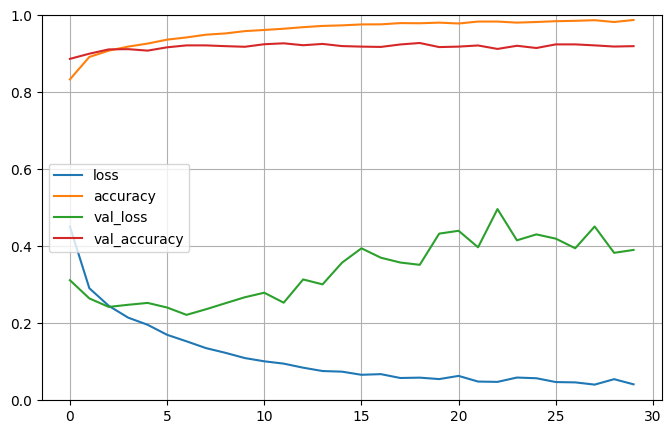

Epoch 1/30
1719/1719 [==============================] - 65s 7ms/step - loss: 0.7527 - accuracy: 0.7311 - val_loss: 0.3883 - val_accuracy: 0.8522
Epoch 2/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4328 - accuracy: 0.8525 - val_loss: 0.3290 - val_accuracy: 0.8782
Epoch 3/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3663 - accuracy: 0.8735 - val_loss: 0.3093 - val_accuracy: 0.8834
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3320 - accuracy: 0.8871 - val_loss: 0.2622 - val_accuracy: 0.9046
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3050 - accuracy: 0.8948 - val_loss: 0.2740 - val_accuracy: 0.8998
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2839 - accuracy: 0.9024 - val_loss: 0.2530 - val_accuracy: 0.9096
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2662 - accuracy: 0.9075 - val_loss: 0.2648 - val_ac

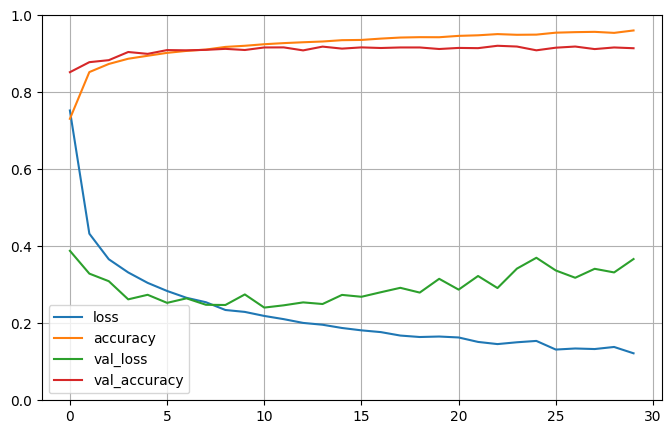

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.9168 - accuracy: 0.6597 - val_loss: 0.6226 - val_accuracy: 0.7758
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5630 - accuracy: 0.7933 - val_loss: 0.4772 - val_accuracy: 0.8268
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4655 - accuracy: 0.8296 - val_loss: 0.4284 - val_accuracy: 0.8458
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4147 - accuracy: 0.8483 - val_loss: 0.3742 - val_accuracy: 0.8676
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3796 - accuracy: 0.8608 - val_loss: 0.3386 - val_accuracy: 0.8804
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3525 - accuracy: 0.8708 - val_loss: 0.3384 - val_accuracy: 0.8780
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3331 - accuracy: 0.8779 - val_loss: 0.3280 - val_accuracy

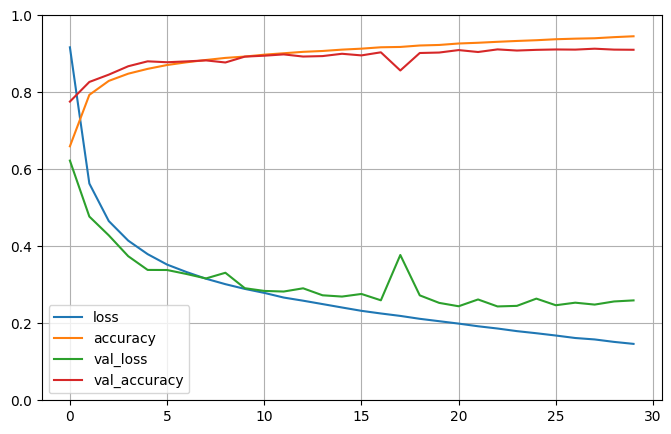

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 1.3991 - accuracy: 0.4832 - val_loss: 0.7072 - val_accuracy: 0.7376
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8338 - accuracy: 0.6876 - val_loss: 0.5822 - val_accuracy: 0.7800
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7023 - accuracy: 0.7403 - val_loss: 0.5105 - val_accuracy: 0.8074
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6287 - accuracy: 0.7711 - val_loss: 0.4677 - val_accuracy: 0.8188
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5826 - accuracy: 0.7918 - val_loss: 0.4182 - val_accuracy: 0.8460
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5424 - accuracy: 0.8086 - val_loss: 0.3937 - val_accuracy: 0.8572
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5147 - accuracy: 0.8213 - val_loss: 0.3724 - val_accuracy

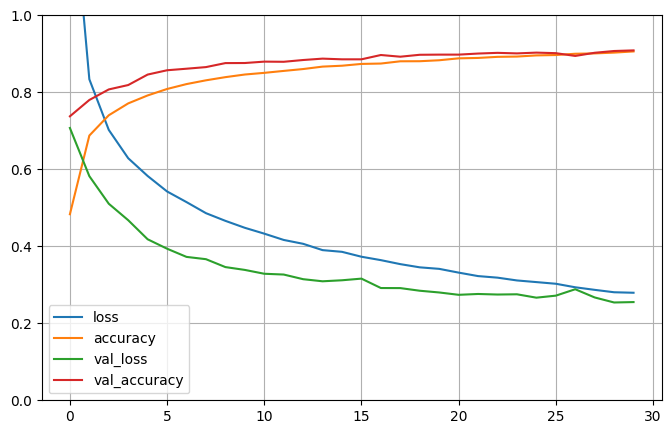

Epoch 1/30
1719/1719 [==============================] - 14s 7ms/step - loss: 0.9510 - accuracy: 0.6593 - val_loss: 0.5673 - val_accuracy: 0.8002
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5191 - accuracy: 0.8082 - val_loss: 0.4537 - val_accuracy: 0.8352
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4311 - accuracy: 0.8428 - val_loss: 0.3765 - val_accuracy: 0.8626
Epoch 4/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3874 - accuracy: 0.8564 - val_loss: 0.4158 - val_accuracy: 0.8406
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3563 - accuracy: 0.8687 - val_loss: 0.3505 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3323 - accuracy: 0.8763 - val_loss: 0.3177 - val_accuracy: 0.8828
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3140 - accuracy: 0.8840 - val_loss: 0.3146 - val_ac

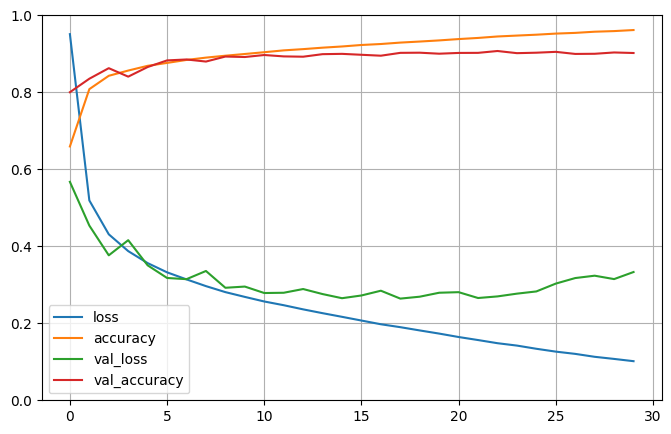

Epoch 1/30
1719/1719 [==============================] - 14s 7ms/step - loss: 1.3315 - accuracy: 0.4971 - val_loss: 0.7223 - val_accuracy: 0.7324
Epoch 2/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.8080 - accuracy: 0.7032 - val_loss: 0.5529 - val_accuracy: 0.7930
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6696 - accuracy: 0.7570 - val_loss: 0.4793 - val_accuracy: 0.8234
Epoch 4/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5921 - accuracy: 0.7891 - val_loss: 0.4273 - val_accuracy: 0.8432
Epoch 5/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5383 - accuracy: 0.8093 - val_loss: 0.3968 - val_accuracy: 0.8570
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5041 - accuracy: 0.8245 - val_loss: 0.4168 - val_accuracy: 0.8464
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4774 - accuracy: 0.8328 - val_loss: 0.3607 - val_ac

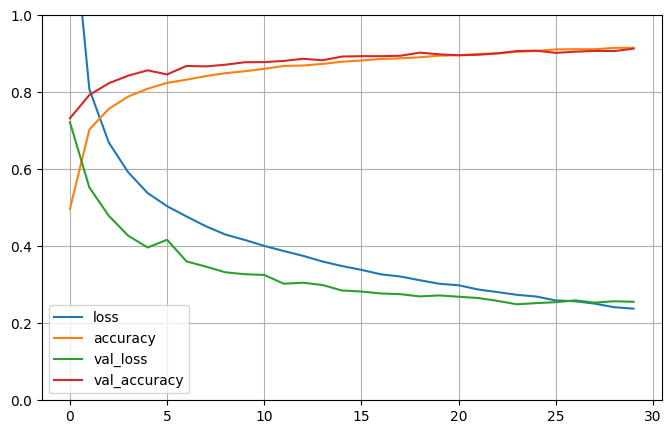

In [ ]:
# Compare different configurations for MNIST
X_train, y_train, X_test, y_test, X_valid, y_valid = prep_data(False)

for adam in [True, False]:
    myMLP = MLP(False, adam)
    myMLP.train(X_train, y_train, X_test, y_test, X_valid, y_valid)
    print("MLP with adam_optimizer = ", adam, " (else SGD)")
    myMLP.figure()
    for olayer in [True, False]:
        for odropout in [True, False]:
            myCNN = CNN(False, olayer, adam, odropout)
            myCNN.train(X_train, y_train, X_test, y_test, X_valid, y_valid)
            print("CNN with adam_optimizer = ", adam, " (else SGD), omit_layer ", olayer, " and omit_dropout= ", odropout)
            myCNN.figure()


Epoch 1/30
1719/1719 [==============================] - 16s 6ms/step - loss: 0.9148 - accuracy: 0.6727 - val_loss: 0.6104 - val_accuracy: 0.7748
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5606 - accuracy: 0.7943 - val_loss: 0.5076 - val_accuracy: 0.8168
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4642 - accuracy: 0.8301 - val_loss: 0.4292 - val_accuracy: 0.8458
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4085 - accuracy: 0.8516 - val_loss: 0.3708 - val_accuracy: 0.8688
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3735 - accuracy: 0.8639 - val_loss: 0.4070 - val_accuracy: 0.8410
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3490 - accuracy: 0.8717 - val_loss: 0.3543 - val_accuracy: 0.8732
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3287 - accuracy: 0.8787 - val_loss: 0.3202 - val_accura

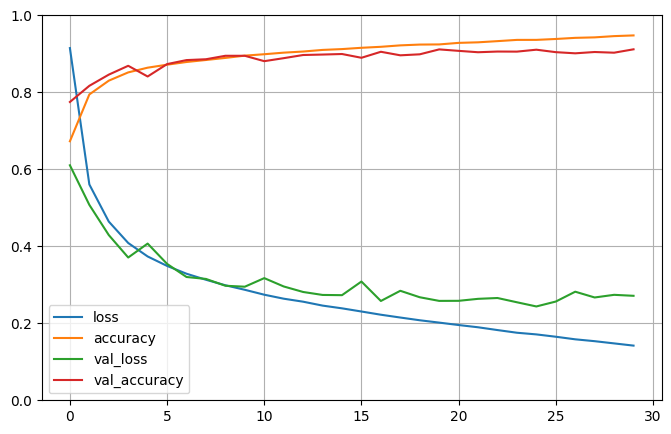

Epoch 1/30
1719/1719 [==============================] - 12s 6ms/step - loss: 1.4261 - accuracy: 0.4713 - val_loss: 0.6857 - val_accuracy: 0.7578
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8369 - accuracy: 0.6889 - val_loss: 0.5635 - val_accuracy: 0.7874
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7009 - accuracy: 0.7416 - val_loss: 0.5199 - val_accuracy: 0.8020
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6294 - accuracy: 0.7697 - val_loss: 0.4632 - val_accuracy: 0.8232
Epoch 5/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.5835 - accuracy: 0.7902 - val_loss: 0.4238 - val_accuracy: 0.8472
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5491 - accuracy: 0.8056 - val_loss: 0.4075 - val_accuracy: 0.8502
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5145 - accuracy: 0.8194 - val_loss: 0.3809 - val_accur

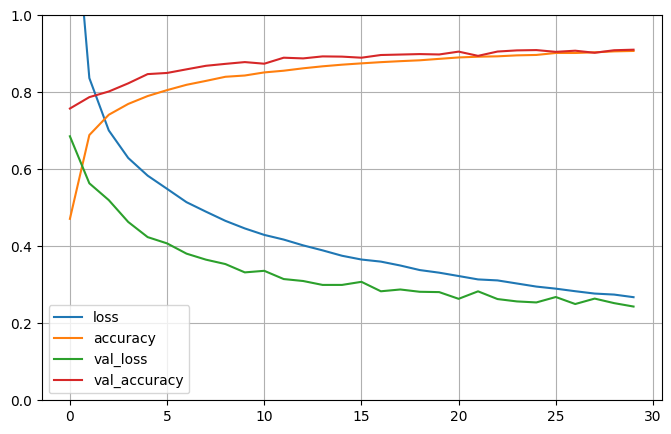

Epoch 1/30
1719/1719 [==============================] - 15s 8ms/step - loss: 1.3893 - accuracy: 0.4813 - val_loss: 0.7096 - val_accuracy: 0.7484
Epoch 2/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.8164 - accuracy: 0.6999 - val_loss: 0.5399 - val_accuracy: 0.7976
Epoch 3/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.6581 - accuracy: 0.7617 - val_loss: 0.4594 - val_accuracy: 0.8378
Epoch 4/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5827 - accuracy: 0.7912 - val_loss: 0.4164 - val_accuracy: 0.8526
Epoch 5/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5373 - accuracy: 0.8109 - val_loss: 0.3924 - val_accuracy: 0.8596
Epoch 6/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5001 - accuracy: 0.8244 - val_loss: 0.3668 - val_accuracy: 0.8644
Epoch 7/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4658 - accuracy: 0.8383 - val_loss: 0.3550 - val_ac

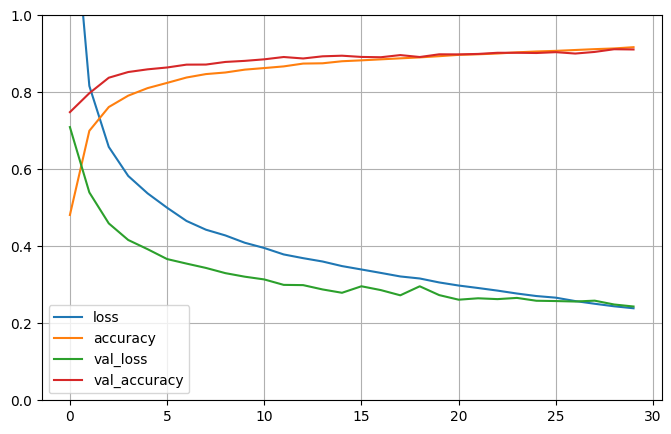

In [15]:
# Apply optimal configurations to CIFAR
X_train, y_train, X_test, y_test, X_valid, y_valid = prep_data(False)

myCNN1 = CNN(True, True, False, True)
myCNN1.train(X_train, y_train, X_test, y_test, X_valid, y_valid)
print("CNN with SGD, 3 convolutional layers and no drop-out layers")
myCNN1.figure()

myCNN2 = CNN(True, True, False, False)
myCNN2.train(X_train, y_train, X_test, y_test, X_valid, y_valid)
print("CNN with SGD, 3 convolutional layers and 2 drop-out layers")
myCNN2.figure()

myCNN3 = CNN(True, False, False, False)
myCNN3.train(X_train, y_train, X_test, y_test, X_valid, y_valid)
print("CNN with SGD, 5 convolutional layers and 2 drop-out layers")
myCNN3.figure()
